In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import dsets
import model.voxel2mesh as network
import config

In [2]:
device = 'cuda'
cfg = config.load_config(0)
model = network.Voxel2Mesh(cfg.ndims, cfg.batch_size, cfg.num_input_channels,
                     cfg.first_layer_channels, cfg.steps, cfg.num_classes,
                     cfg.graph_conv_layer_count, cfg.batch_norm, cfg)

In [61]:
state_dict_path = '../voxel2meshRuns/models/prova1/seg_2021-11-09_12.45.19_prova1.1073.state'
state_dict = torch.load(state_dict_path)
model.load_state_dict(state_dict['model_state'])
model = model.to(device)

In [62]:
ds = dsets.SegmentationDataset(patient_name='A2')
dl = DataLoader(ds)

<dsets.SegmentationDataset object at 0x7f202856ac10>: 1 general series


In [63]:
iterator = iter(dl)
sample = next(iterator)

In [64]:
sample['x'] = sample['x'].to(device)
sample['y_voxels'] = sample['y_voxels'].to(device)
sample['surface_points'] = sample['surface_points'].to(device)


result = model(sample)

In [65]:
import pyvista as pv

In [59]:
for a in result[0][4]:
    if a is not None:
        print(a.shape)
        print(a.dtype)
    else:
        print('null')

torch.Size([1, 1536, 3])
torch.float32
torch.Size([1, 3068, 3])
torch.int64
torch.Size([1, 1536, 32])
torch.float32
null
torch.Size([1, 1536, 3])
torch.float32


In [66]:
idx = -1

vertices = result[0][idx][0].detach().cpu().numpy().squeeze()
tria = result[0][idx][1].detach().cpu().numpy().squeeze()
temp = np.array([3]*tria.shape[0])
tria = np.c_[temp, tria]
pv.PolyData(vertices, tria).save('prova.vtk')

In [19]:
import matplotlib.pyplot as plt

<ipython-input-75-96ec59c0e808>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for sliceIdx in np.linspace(0,384,10, dtype=np.int):


IndexError: index 384 is out of bounds for axis 2 with size 384

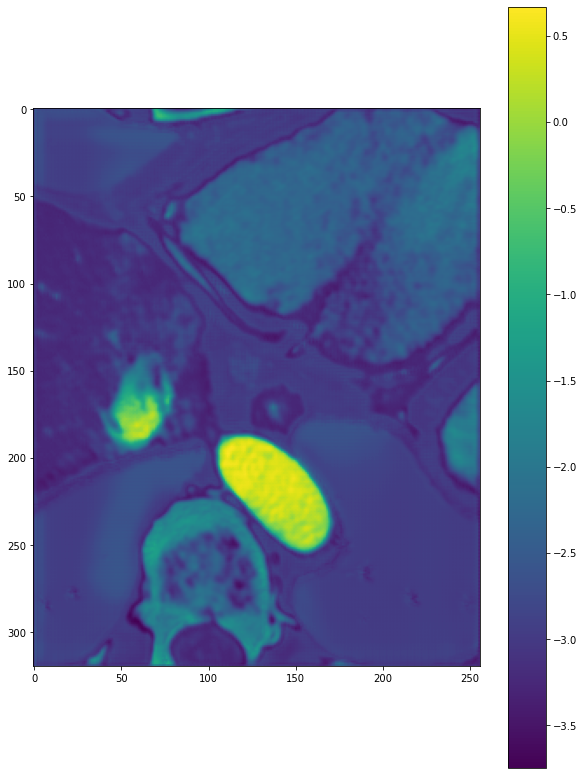

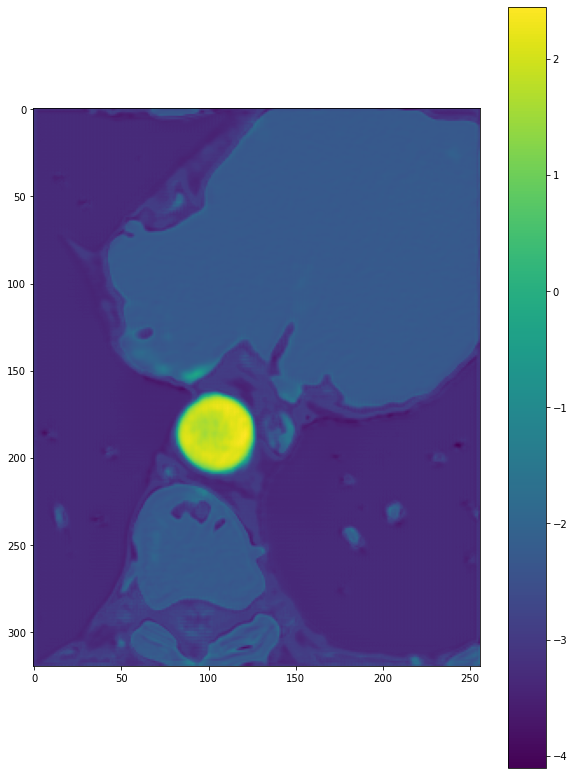

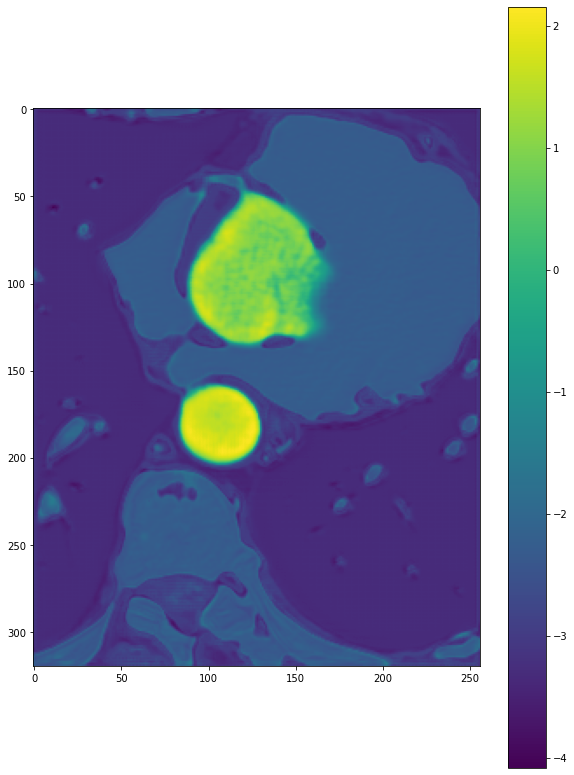

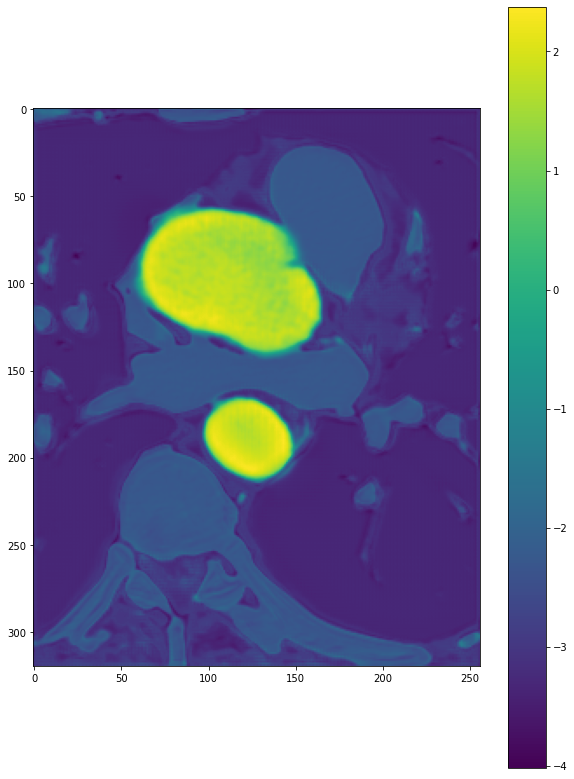

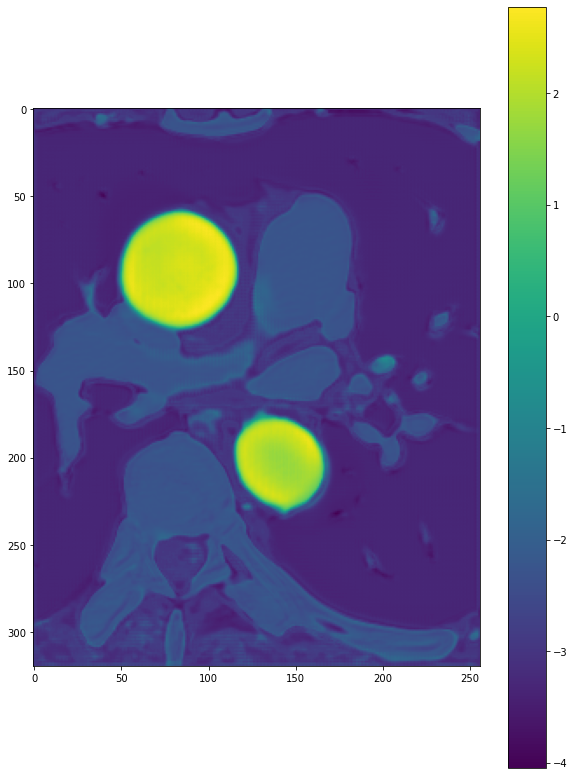

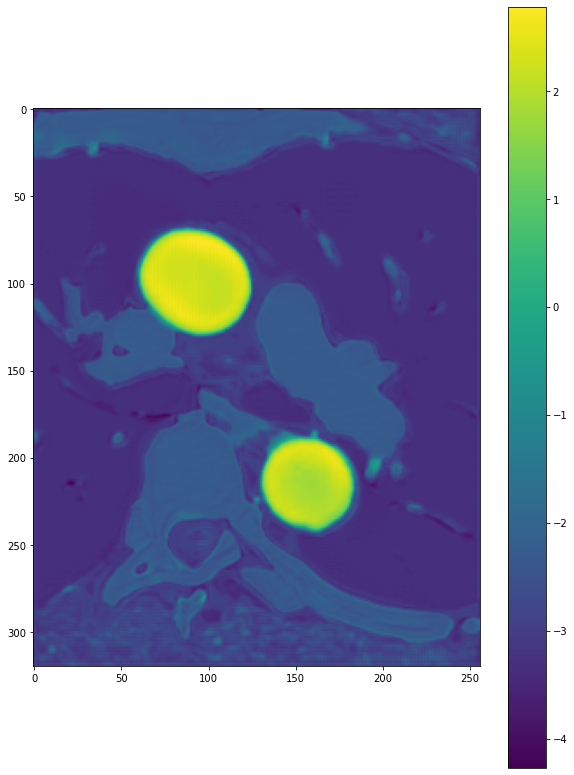

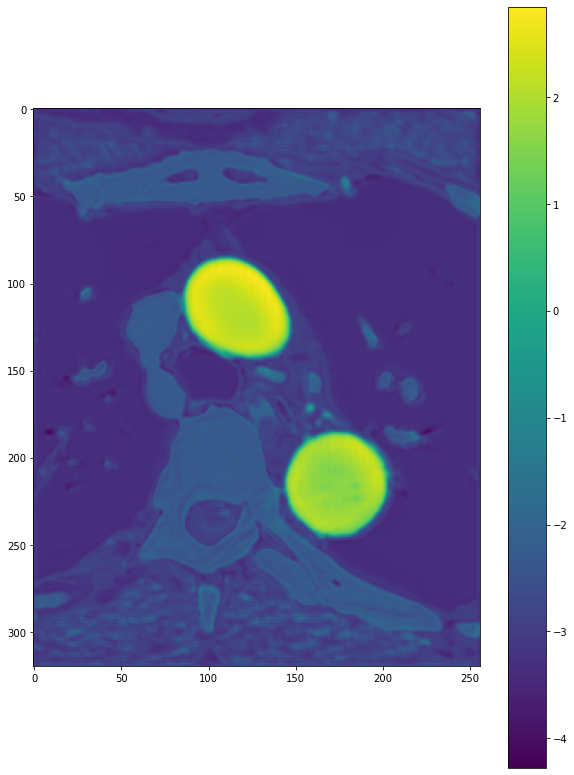

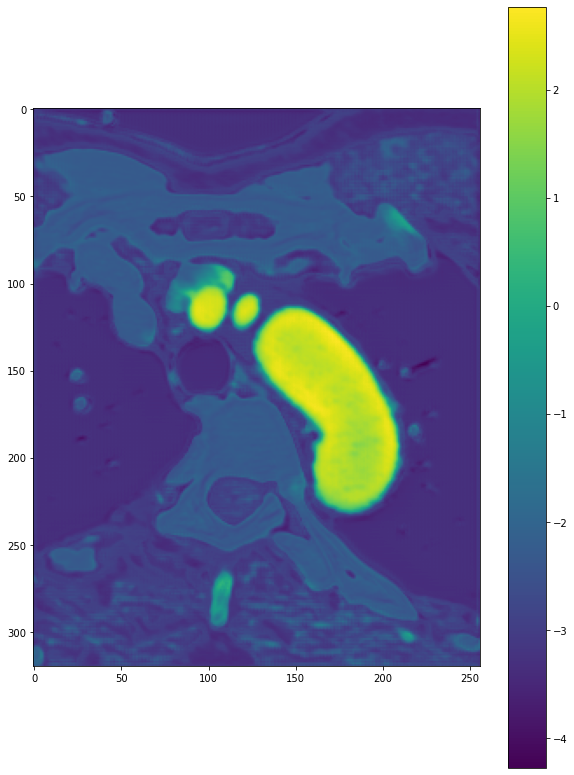

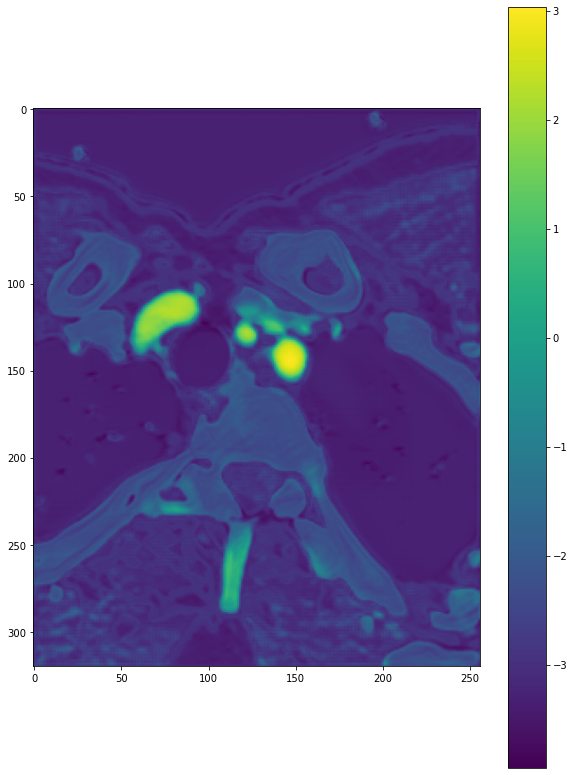

<Figure size 720x1008 with 0 Axes>

In [75]:
idx = 5

sliceIdx = 350
for sliceIdx in np.linspace(0,384,10, dtype=np.int):
    plt.figure(figsize=(10,14))
    plt.imshow(result[0][idx][3].detach().cpu().numpy()[0,1,sliceIdx])
    plt.colorbar()

In [38]:
for a in result[0]: print(type(a))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [74]:
np.linspace(0,384,10, dtype=np.int)

<ipython-input-74-dc471c2b90c3>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.linspace(0,384,10, dtype=np.int)


array([  0,  42,  85, 128, 170, 213, 256, 298, 341, 384])